## Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

# Importing Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Importing CSV File

In [2]:
df=pd.read_csv("Company_Data.csv")

# EDA

#### Converting sales data into 3 categories Low, High, Medium by Making sales columns

In [3]:
# we need 3 values for low medium and high so making 4 bins so we get 3 regions
bins = np.linspace(min(df['Sales']), max(df['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [4]:
label_names = ['Low', 'Medium', 'High']

In [5]:
df['Sales_bin'] = pd.cut(df['Sales'], bins, labels=label_names, include_lowest=True )
df[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [7]:
df["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
df["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [9]:
df["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
df.shape

(400, 12)

In [11]:
# to see stastetical values
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_bin    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [13]:
# to see if there any null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_bin      0
dtype: int64

#### Feature Engineering

In [15]:
df=df.drop(("Sales"),axis=1) # we dont need it anymore

In [16]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [17]:
#Creating dummy vairables for ['ShelveLoc','Urban','US'] dropping first dummy variable
df=pd.get_dummies(df,columns=['ShelveLoc','Urban','US'], drop_first=True)


In [18]:
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_bin,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,Medium,0,0,1,1
1,111,48,16,260,83,65,10,High,1,0,1,1
2,113,35,10,269,80,59,12,Medium,0,1,1,1
3,117,100,4,466,97,55,14,Medium,0,1,1,1
4,141,64,3,340,128,38,13,Low,0,0,1,0


# Visualisation

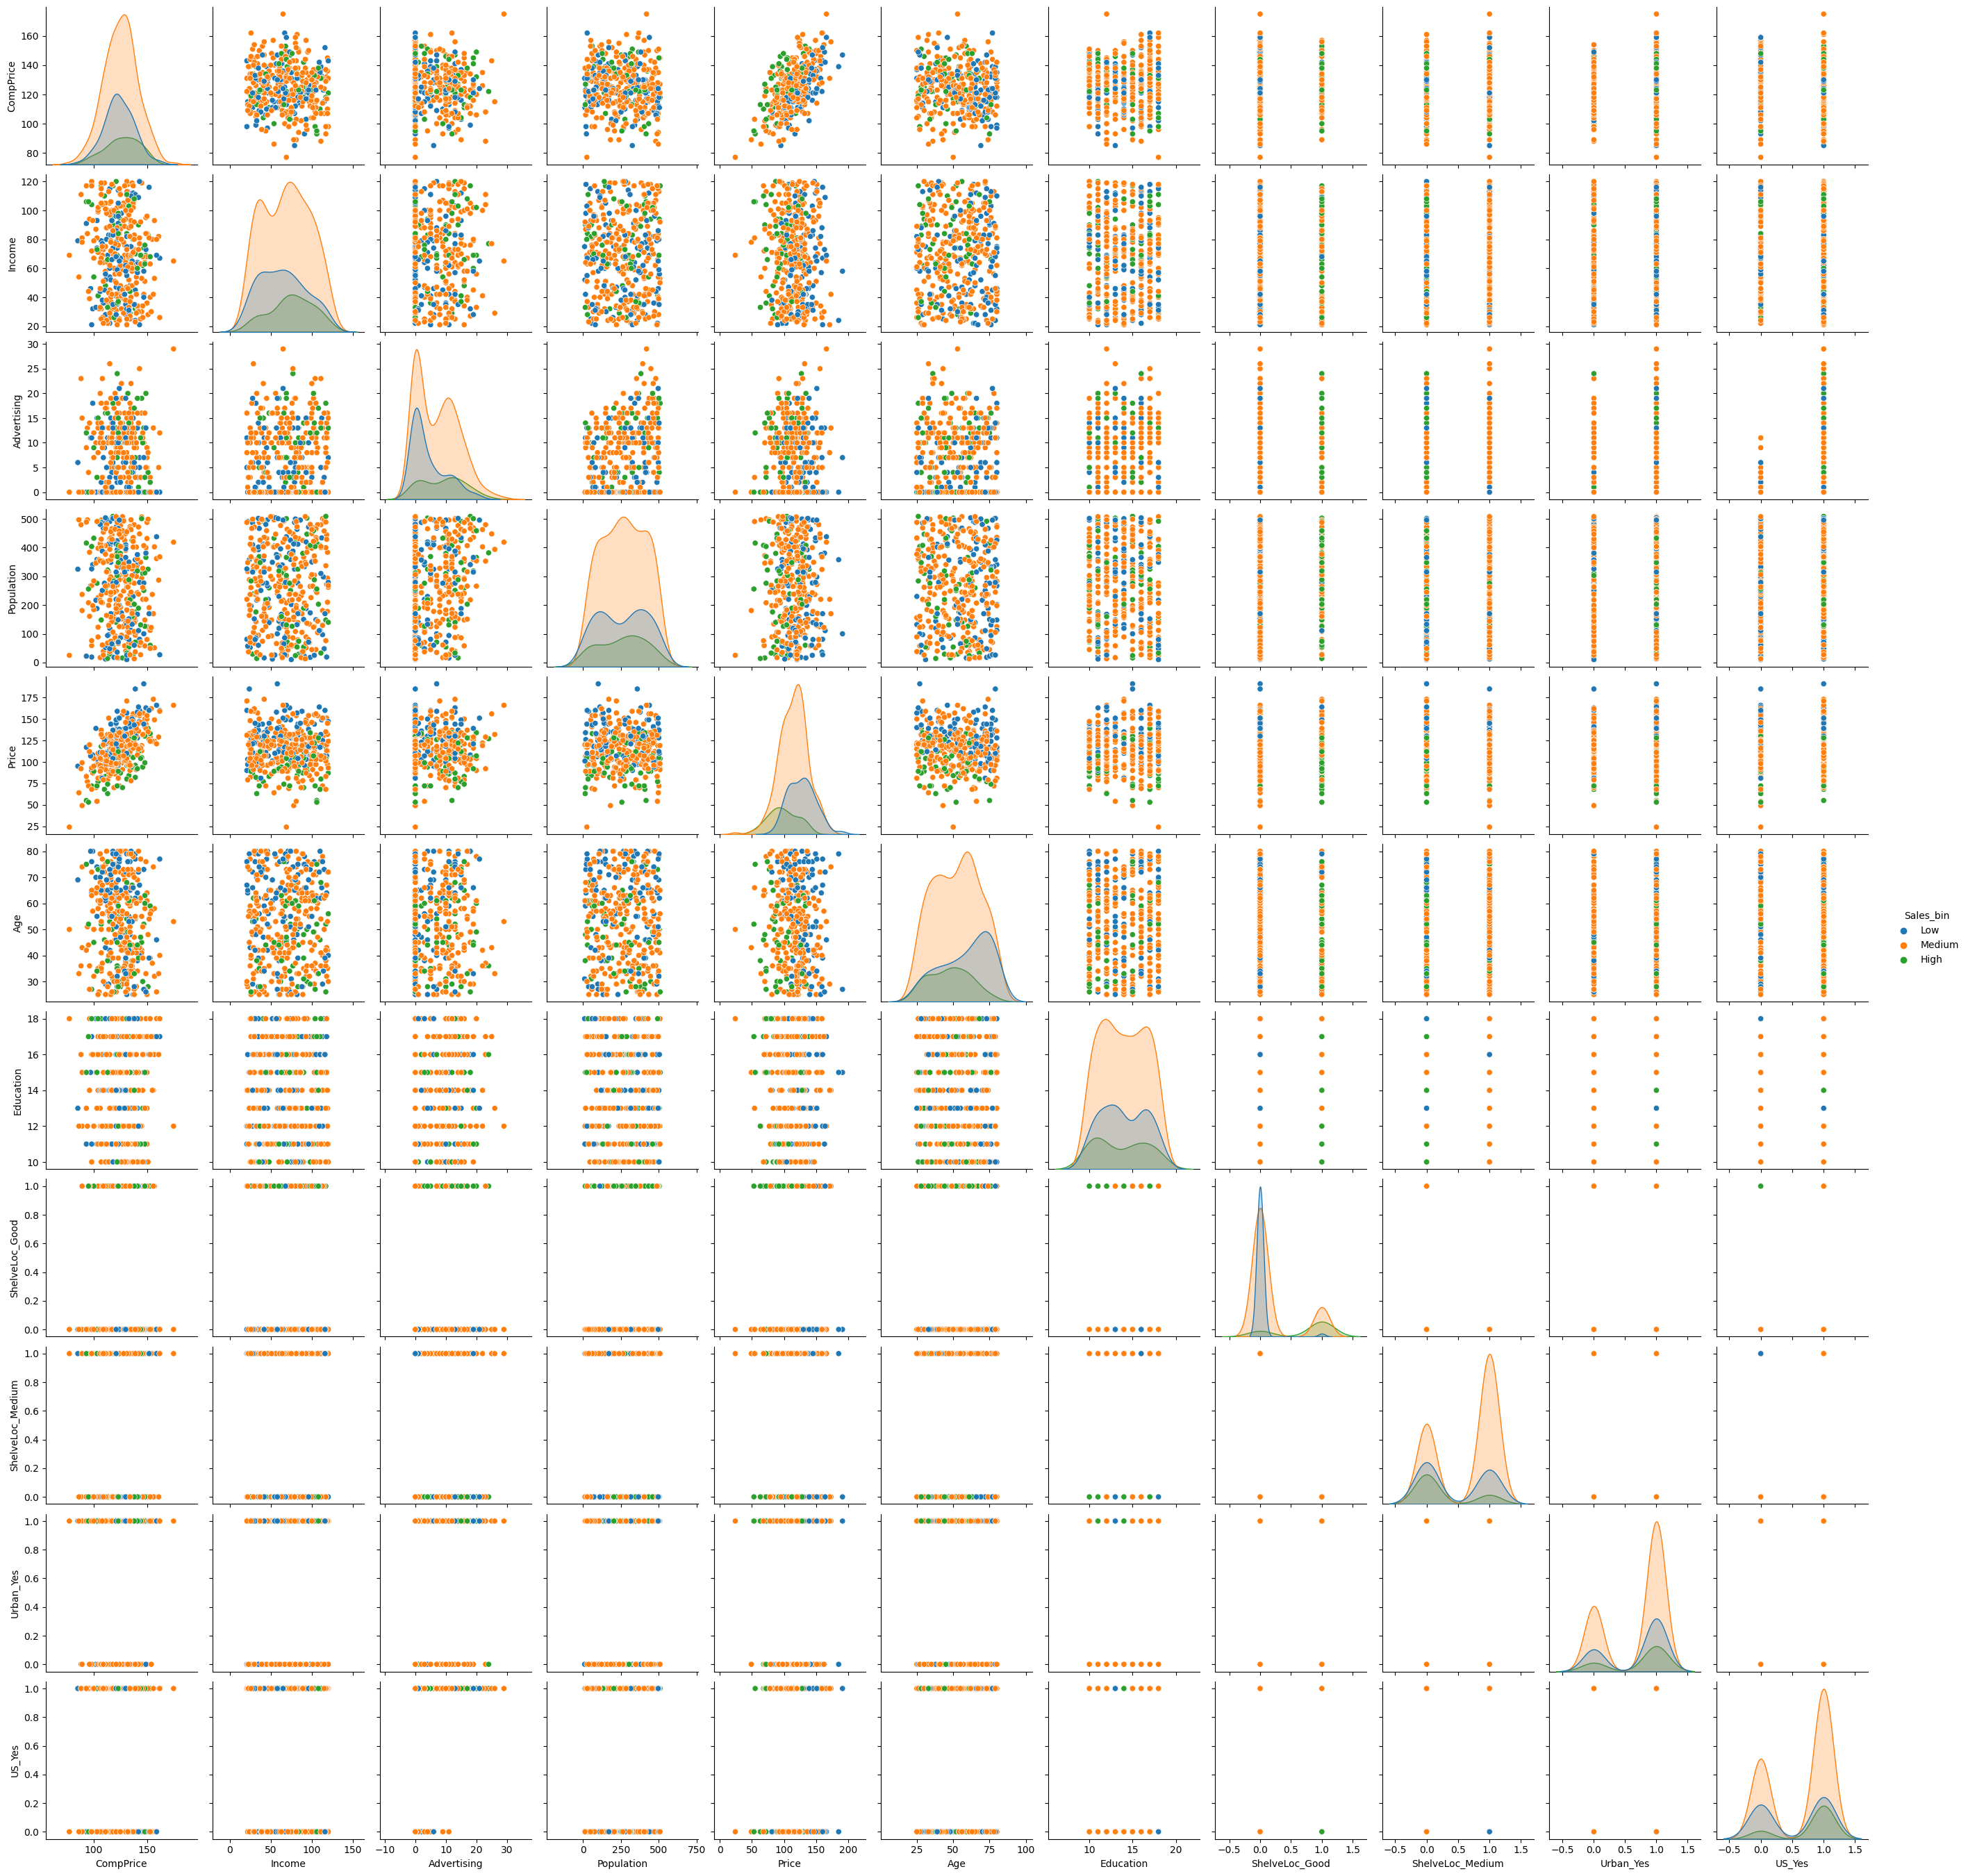

In [19]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Sales_bin')

<ipython-input-20-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


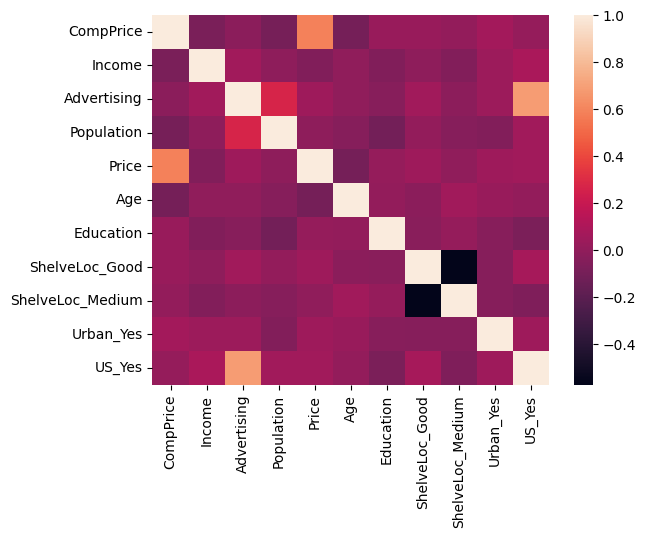

In [20]:
sns.heatmap(df.corr())
plt.show()

# Splitting into Train and Test Data

In [21]:
X=df.drop('Sales_bin',axis=1)
y=df.Sales_bin

In [22]:
X.shape

(400, 11)

In [23]:
y.shape

(400,)

In [24]:
# splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=50)

In [25]:
X_train.shape

(280, 11)

In [26]:
y_train.shape

(280,)

In [27]:
X_test.shape

(120, 11)

In [28]:
y_train.shape

(280,)

# Building Random Forest Classifier

In [29]:
n_trees=100 #giving number of trees to make
max_fea=6 # number of maximum features
model1 =  RandomForestClassifier(n_estimators=n_trees,max_features=max_fea)

In [30]:
# Evaluate the base model(without hypertuning)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(model1, X_train, y_train,cv=cv)
print("Accuracy is:",np.mean(result))

Accuracy is: 0.7428571428571429


In [31]:
# Iterating over a range of folds in StratifiedKFold
mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(model1, X_train, y_train, cv=cv2)
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)

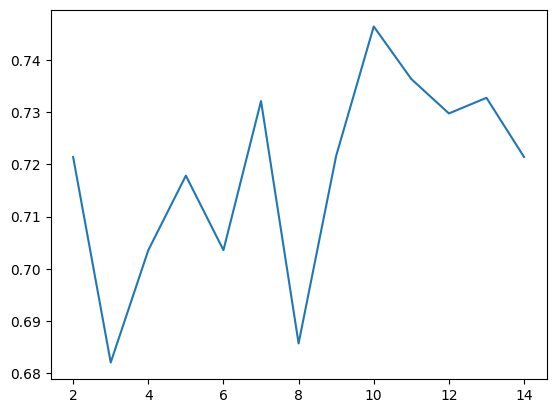

In [32]:
# Visualizing the scores generated for each number of folds
sns.lineplot(x=n_folds,y=mean_accuracy)
plt.show()

In [33]:
# Now Fit the model
model1.fit(X_train,y_train)
model1.feature_importances_

array([0.13273193, 0.09276718, 0.07758111, 0.09259086, 0.22825389,
       0.11528063, 0.05943766, 0.09418134, 0.07069197, 0.02092498,
       0.01555844])

In [34]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [35]:
# finding the important features of the model
cols=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age','Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes','US_Yes']
feature_imp=pd.Series(model1.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Price               0.228254
CompPrice           0.132732
Age                 0.115281
ShelveLoc_Good      0.094181
Income              0.092767
Population          0.092591
Advertising         0.077581
ShelveLoc_Medium    0.070692
Education           0.059438
Urban_Yes           0.020925
US_Yes              0.015558
dtype: float64

# Visualization

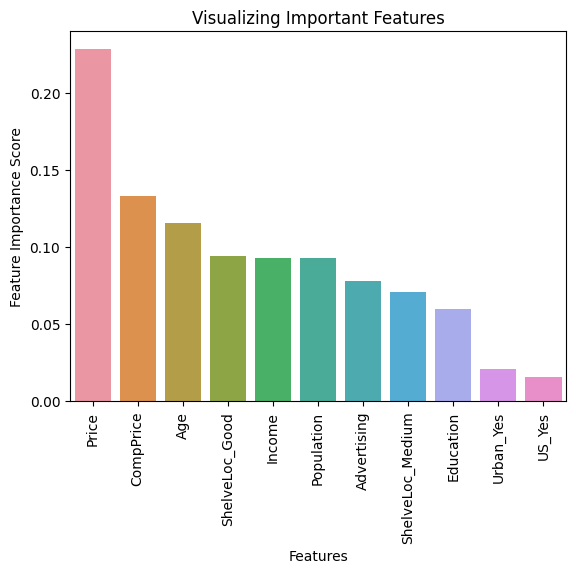

In [36]:
# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.title("Visualizing Important Features")
plt.show()

In [37]:
# Prediction on test data
pred1 = model1.predict(X_test)
pd.Series(pred1).value_counts()

Medium    88
Low       19
High      13
dtype: int64

In [38]:
pred1

array(['Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Low', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium

In [39]:
pred1

array(['Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Low', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium

# Accuracy

In [40]:
accuracy_score(pred1,y_test)

0.7166666666666667

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

        High       0.54      0.47      0.50        15
         Low       0.79      0.48      0.60        31
      Medium       0.73      0.86      0.79        74

    accuracy                           0.72       120
   macro avg       0.69      0.61      0.63       120
weighted avg       0.72      0.72      0.70       120



In [42]:
print(confusion_matrix(y_test,pred1))

[[ 7  0  8]
 [ 0 15 16]
 [ 6  4 64]]


# Inference
as we can see the simple model without any hypertuning got 73.33% accuracy which is decent so
#### This would be the best model here